# Module 7 - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn #library for predictive modeling

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

#load_boston is a sample dataset from the scikit-learn library
boston = load_boston()

## Available Datasets
load_boston([return_X_y])	Load and return the boston house-prices dataset (regression). 

load_iris([return_X_y])	Load and return the iris dataset (classification). 

load_diabetes([return_X_y])	Load and return the diabetes dataset (regression). 

load_digits([n_class, return_X_y])	Load and return the digits dataset (classification). 

load_linnerud([return_X_y])	Load and return the linnerud dataset (multivariate regression). 

load_wine([return_X_y])	Load and return the wine dataset (classification). 

load_breast_cancer([return_X_y])	Load and return the breast cancer wisconsin dataset (classification).

In [3]:
#data = dataset, target = dependent variable, feature_names = column headers, DESCR = data dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
#506 rows, 13 columns
boston.data.shape

(506, 13)

In [5]:
#list of column names from sample Boston dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#description of the sample Boston housing dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
#make a dataframe from the sample Boston housing dataset
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#add the list of column names from the sample Boston housing dataset to the dataframe
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#verifying the first 5 rows in the dependent variable datatset
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [10]:
#assigning dependent variable to column named "Price"
bos['PRICE'] = boston.target

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


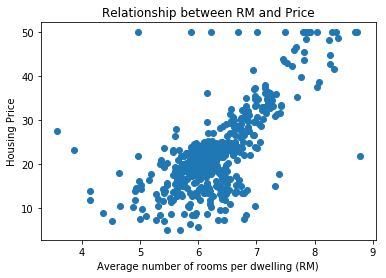

In [12]:
#compare number of rooms to home price
plt.scatter(bos['RM'], bos['PRICE']) 
plt.xlabel("Average number of rooms per dwelling (RM)") 
plt.ylabel("Housing Price") 
plt.title("Relationship between RM and Price") 
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

#make dataframe that only contains predictive features
X = bos.drop('PRICE', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Important functions to keep in mind while fitting a linear regression model are: 
    
- lm.fit() -> fits a linear model 

- lm.predict() -> Predict Y using the linear model with estimated coefficients 

- lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

In [14]:
#same as statsmodel; fit will calculate linear regression model based on values of predictive features
lm.fit(X, bos['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#y-intercept for the linear regression formula
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.4911032804


In [16]:
#number of predictive features
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [17]:
#show the slope (weight) for each predictive feature
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [18]:
#show the first 5 values that the model predicted
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

In [19]:
#score determines how accurate the model predicted
lm.score(X, bos['PRICE'])

0.7406077428649428

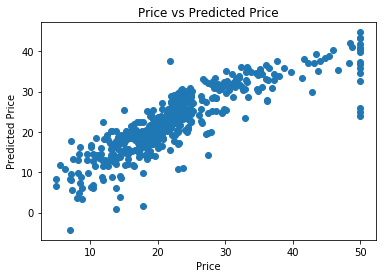

In [20]:
#visual comparison between the true price of a house and the price the model predicted
plt.scatter(bos['PRICE'], lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

# Randomize train and test data

Training data should be randomize so that the model can learn from a diverse set of predictive features. This helps it to have better predictive ability when trying on a test set (data that it has not seen before).

In [21]:
#test_size default = 0.25
#train_test_split function give back 4 variables
#2 variables for X (the predictive features) - training and testing
#2 variables for y (the target) - training and testing

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [22]:
#calculate the model using the training data
lm.fit(X_train, Y_train)

#predictions for training and test data
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [23]:
#evaluate the accuracy of the model of training vs test
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

0.755133274178
0.695538800551
